<a href="https://colab.research.google.com/github/Drishtii24/DeepLearning2025-26-DrishtiChauhan/blob/main/ML_IBM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow and Keras

In [ ]:
#Step1: import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [ ]:
#Step2: Create simple training data
#Features: [Study_hours, Sleep_hours]
X = np.array([
    [2,9],
    [1,5],
    [3,6],
    [4,8],
    [6,9],
    [5,5],
    [7,3]
], dtype=float)

#Labels: 1 = Pass, 0 = Fail
y = np.array([
    [0],
    [0],
    [0],
    [1],
    [1],
    [0],
    [1]
], dtype=float)

In [ ]:
#Step3: Normalize data(important for neural network)
X = X / np.amax(X, axis = 0) #scale all values between 0 and 1


In [ ]:
#Step4: build the neural network model
model = keras.Sequential([
    layers.Dense(4, input_dim=2, activation='relu'),  #hidden layer with 4 neurons
    layers.Dense(1, activation='sigmoid') #output layer(binary output)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Step5: compile the model
model.compile(
    optimizer='adam',  #optimization algorithm
    loss='binary_crossentropy', #suitable for binary classification
    metrics=['accuracy']  #to measure performance
)

In [ ]:
#Step6: train the model
model.fit(X, y, epochs=200, verbose=0)  #train for 200 epochs quietly

In [ ]:
#Step7: Test the model with a new input
test_data = np.array([[4,7]]) / np.amax(X, axis=0)  #normalize test input
prediction = model.predict(test_data)

print("Predicted Output (1=Pass, 0=Fail): ", prediction)

if prediction>=0.5:
  print("The student is likely to Pass")
else:
  print("The student is likely to Fail")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Output (1=Pass, 0=Fail):  [[0.02326432]]
The student is likely to Fail


PCA

In [ ]:
#Step1: import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [ ]:
#Step2: load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
#Step3: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

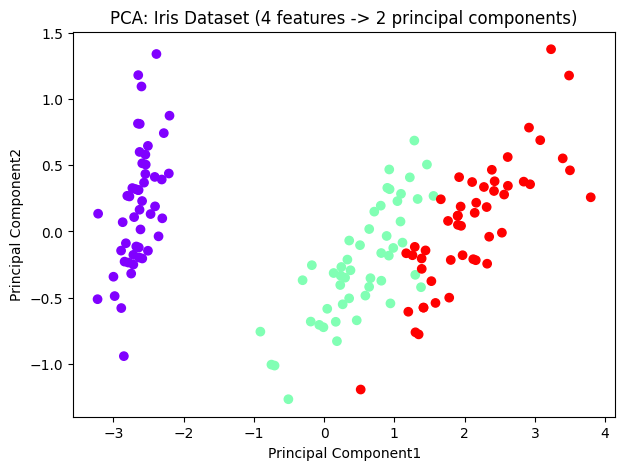

In [ ]:
#Step4: Visualize the results
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow')
plt.title("PCA: Iris Dataset (4 features -> 2 principal components)")
plt.xlabel("Principal Component1")
plt.ylabel("Principal Component2")
plt.show()

K-MEANS CLUSTERING

In [ ]:
#Step1: import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
#Step2: create one sample data
X = np.array([
    [1,2], [1.5, 1.8], [5,8],
    [8,8], [1,0.6], [9,11],
    [8,2], [10,2], [9,3]
])

In [ ]:
#Step3: Build K-Means model
kmeans = KMeans(n_clusters=3, random_state=0)

In [ ]:
#Step4: fit the model
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [ ]:
#Step5: Get cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

Text(0.5, 0, 'X-axis')

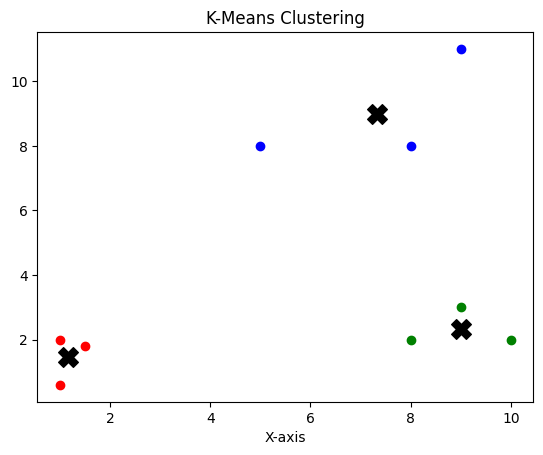

In [ ]:
#Step6: visualize the clusters
colors = ['red', 'green', 'blue']

for i in range(len(X)):
  plt.scatter(X[i][0], X[i][1], color=colors[labels[i]])

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='black')
plt.title("K-Means Clustering")
plt.xlabel("X-axis")

HIERARCHICAL CLUSTERING

In [ ]:
!pip install scipy

In [ ]:
#Step1: importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#Step2: create sample data
X = np.array([
    [1,2], [1.5,1.8], [5,8],
    [8,8], [1,0.6], [9,11],
    [8,2], [10,2], [9,3]
])

In [ ]:
#Step3: Perform hierarchical clustering
Z = linkage(X, method='ward') #'ward' minimizes variance


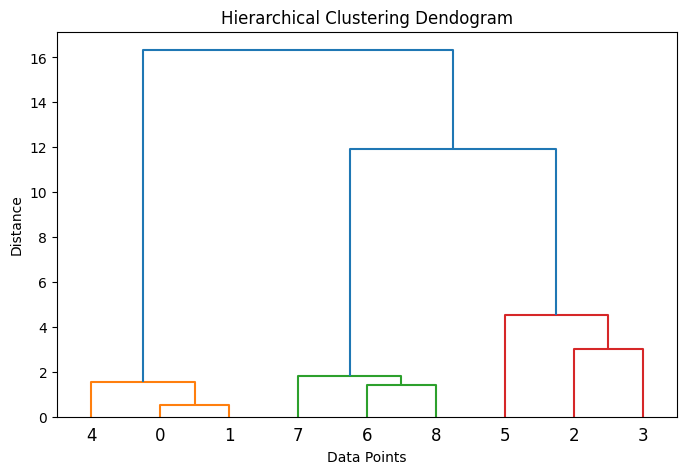

In [ ]:
#Step4: plot the dendogram
plt.figure(figsize=(8,5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [ ]:
#Step5: Form clusters
clusters = fcluster(Z, t=3, criterion='maxclust')

print("Cluster labels: ", clusters)

Cluster labels:  [1 1 3 3 1 3 2 2 2]
